In [437]:
# Importing the packages
import os
import sys
import warnings

import numpy as np
import pandas as pd
from mizani.formatters import percent_format
from plotnine import *
from datetime import datetime
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import norm
from IPython.core.display import HTML
from stargazer.stargazer import Stargazer
import statsmodels.nonparametric.kernel_regression as loess

warnings.filterwarnings("ignore")


In [438]:
# Current script folder
current_path = os.getcwd()
dirname = current_path.split("desktop")[0]

# location folders
data_in = dirname + "/da_data_repo/cps-earnings/clean/"
data_out = dirname + "/da_case_studies/ch09-gender-age-earnings/"
output = dirname + "/da_case_studies/ch09-gender-age-earnings/output/"
func = dirname + "/da_case_studies/ch00-tech-prep/"
sys.path.append(func)

In [439]:
from py_helper_functions import *

In [440]:
# skimpy: use skim for nicer looking descriptive tables
from skimpy import skim

In [441]:
# load cps_earnings data
data_all= pd.read_csv(data_in + "morg-2014-emp.csv")

In [442]:
data_all

,Unnamed: 0,hhid,intmonth,stfips,weight,earnwke,uhours,grade92,race,ethnic,...,ownchild,chldpres,prcitshp,state,ind02,occ2012,class,unionmme,unioncov,lfsr94
0,3,2600310997690,January,AL,3151.6801,1692.00,40,43,1,NaN,...,0,0,"Native, Born In US",63,Employment services (5613),630,"Private, For Profit",No,No,Employed-At Work
1,5,75680310997590,January,AL,3457.1138,450.00,40,41,2,NaN,...,2,6,"Native, Born In US",63,Outpatient care centers (6214),5400,"Private, For Profit",No,No,Employed-Absent
2,6,75680310997590,January,AL,3936.9110,1090.00,60,41,2,NaN,...,2,6,"Native, Born In US",63,Motor vehicles and motor vehicle equipment man...,8140,"Private, For Profit",No,No,Employed-At Work
3,10,179140131100930,January,AL,3288.3640,769.23,40,40,1,NaN,...,2,4,"Native, Born In US",63,"**Publishing, except newspapers and software (...",8255,"Private, For Profit",Yes,NaN,Employed-At Work
4,11,179140131100930,January,AL,3422.8500,826.92,40,43,1,NaN,...,2,4,"Native, Born In US",63,"Banking and related activities (521, 52211,52219)",5940,"Private, For Profit",No,No,Employed-At Work
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149311,317051,896679860459501,December,WY,346.2296,692.30,40,39,1,NaN,...,0,0,"Native, Born In US",8,Office supplies and stationery stores (45321),4760,"Private, For Profit",No,No,Employed-At Work
149312,317052,907086820569600,December,WY,294.9800,1984.61,40,44,1,NaN,...,1,3,"Native, Born In US",8,Administration of human resource programs (923),430,Government - State,No,No,Employed-At Work
149313,317053,907086820569600,December,WY,324.1761,2884.61,55,43,1,NaN,...,1,3,"Native, Born In US",8,Nursing care facilities (6231),10,"Private, For Profit",No,No,Employed-At Work
149314,317055,950868097156649,December,WY,321.6982,1153.84,40,42,1,NaN,...,0,0,"Native, Born In US",8,Hospitals (622),5820,"Private, Nonprofit",No,No,Employed-At Work


In [443]:
# filter occupations: financial analyst and computer hardware engineers
data_all.loc[data_all["occ2012"] == 840, "sample"] = 1
data_all.loc[data_all["sample"].isna(), "sample"] = 0
data_all

,Unnamed: 0,hhid,intmonth,stfips,weight,earnwke,uhours,grade92,race,ethnic,...,chldpres,prcitshp,state,ind02,occ2012,class,unionmme,unioncov,lfsr94,sample
0,3,2600310997690,January,AL,3151.6801,1692.00,40,43,1,NaN,...,0,"Native, Born In US",63,Employment services (5613),630,"Private, For Profit",No,No,Employed-At Work,0.0
1,5,75680310997590,January,AL,3457.1138,450.00,40,41,2,NaN,...,6,"Native, Born In US",63,Outpatient care centers (6214),5400,"Private, For Profit",No,No,Employed-Absent,0.0
2,6,75680310997590,January,AL,3936.9110,1090.00,60,41,2,NaN,...,6,"Native, Born In US",63,Motor vehicles and motor vehicle equipment man...,8140,"Private, For Profit",No,No,Employed-At Work,0.0
3,10,179140131100930,January,AL,3288.3640,769.23,40,40,1,NaN,...,4,"Native, Born In US",63,"**Publishing, except newspapers and software (...",8255,"Private, For Profit",Yes,NaN,Employed-At Work,0.0
4,11,179140131100930,January,AL,3422.8500,826.92,40,43,1,NaN,...,4,"Native, Born In US",63,"Banking and related activities (521, 52211,52219)",5940,"Private, For Profit",No,No,Employed-At Work,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149311,317051,896679860459501,December,WY,346.2296,692.30,40,39,1,NaN,...,0,"Native, Born In US",8,Office supplies and stationery stores (45321),4760,"Private, For Profit",No,No,Employed-At Work,0.0
149312,317052,907086820569600,December,WY,294.9800,1984.61,40,44,1,NaN,...,3,"Native, Born In US",8,Administration of human resource programs (923),430,Government - State,No,No,Employed-At Work,0.0
149313,317053,907086820569600,December,WY,324.1761,2884.61,55,43,1,NaN,...,3,"Native, Born In US",8,Nursing care facilities (6231),10,"Private, For Profit",No,No,Employed-At Work,0.0
149314,317055,950868097156649,December,WY,321.6982,1153.84,40,42,1,NaN,...,0,"Native, Born In US",8,Hospitals (622),5820,"Private, Nonprofit",No,No,Employed-At Work,0.0


In [444]:
data_all["sample"].value_counts()
# 253 financial analyst

sample
0.0    149063
1.0       253
Name: count, dtype: int64

In [445]:
data_all["female"] = (data_all["sex"] == 2) # filtering female employees
data_all["w"] = data_all["earnwke"] / data_all["uhours"] # hourly wages
data_all["lnw"] = np.log(data_all["w"])

In [446]:
i = 1 # we consider only financial analysts
data= data_all.loc[data_all["sample"] == i, :].reset_index(drop=True) 
data.to_csv(data_out + "earnings_inference.csv", index=False)

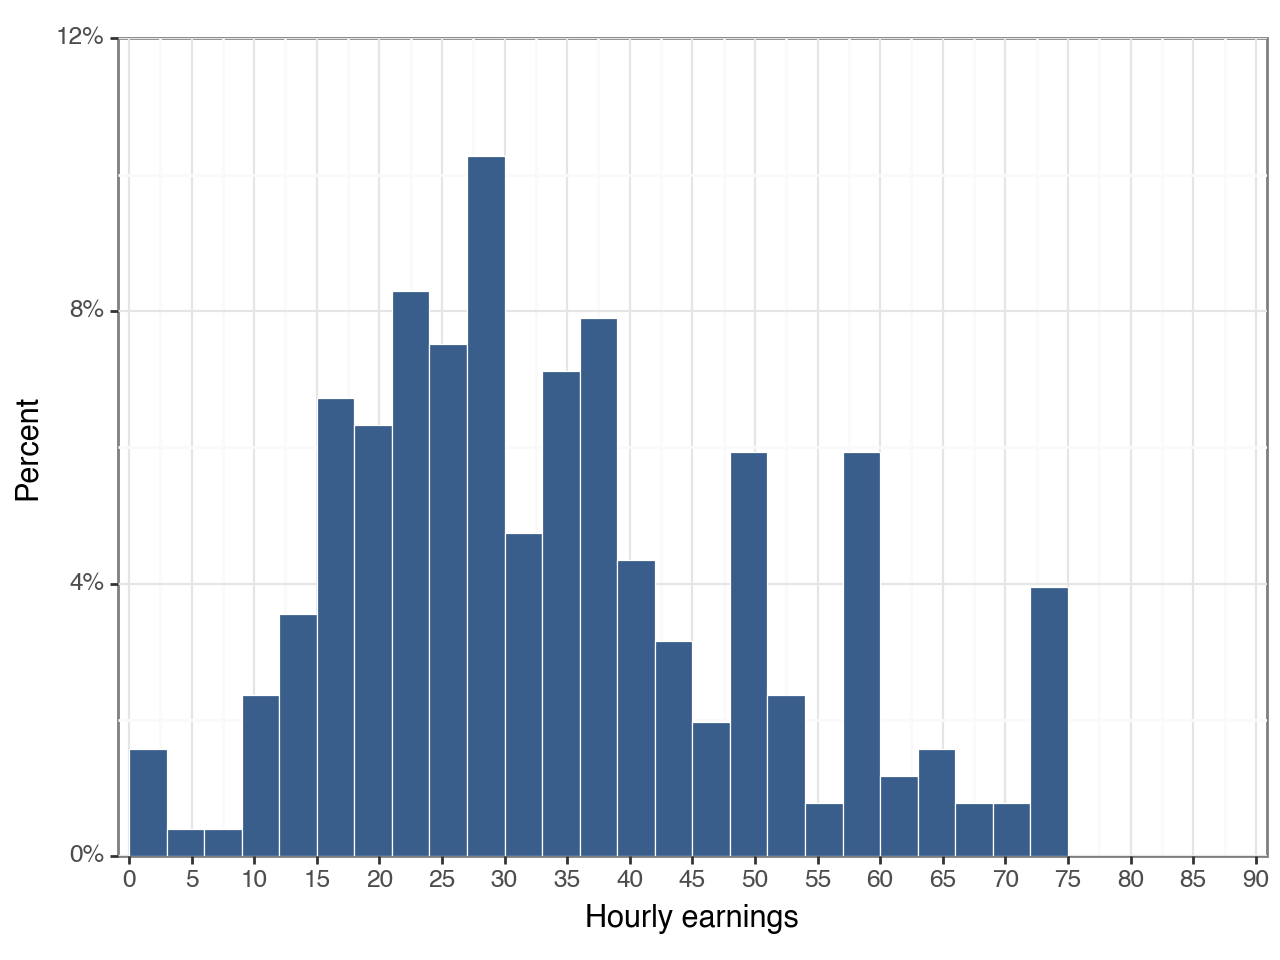

<Figure Size: (640 x 480)>

In [447]:
(
    ggplot(data, aes(x="w", y="stat(count)/sum(stat(count))"))
    + geom_histogram(
        binwidth=3,
        boundary=0,
        color="white",
        fill=color[0],
        size=0.25,
        alpha=0.8,
        show_legend=False,
        na_rm=True,
    )
    + labs(x="Hourly earnings", y="Percent")
    + expand_limits(x=0.01, y=0.01)
    + scale_x_continuous(expand=(0.01, 0.01), limits=(0, 90), breaks=seq(0, 90, 5))
    + scale_y_continuous(
        labels=percent_format(), #mizani
        breaks=seq(0, 0.12, 0.04),
        limits=(0, 0.12),
        expand=(0.0, 0.0),
    )
    + theme_bw()
)

In [448]:
data.loc[:, ["earnwke", "uhours", "w", "lnw"]].describe()

,earnwke,uhours,w,lnw
count,253.000000,253.000000,253.000000,253.000000
mean,1505.364704,43.960474,34.483926,3.349333
std,732.353654,7.471535,16.445032,0.934192
min,1.000000,20.000000,0.022222,-3.806662
25%,961.530000,40.000000,21.770566,3.080559
50%,1423.000000,40.000000,32.000000,3.465736
75%,1923.070000,45.000000,45.192250,3.810926
max,2884.610000,85.000000,72.115250,4.278266


In [449]:
data["female"] = data["female"].astype(int)  #from boolean to 0,1
data["female"].value_counts()
# 107 females and 146 males

female
0    146
1    107
Name: count, dtype: int64

### Task 1 - Show the unconditional gender gap.
#### Linear regressions
**Log-level**:

$(\ln{w})^E = \alpha + \beta \times female$



In [450]:
reg1 = smf.ols(formula="lnw~female", data=data).fit()
reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    lnw   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.169
Date:                Sun, 26 Nov 2023   Prob (F-statistic):              0.281
Time:                        01:48:21   Log-Likelihood:                -340.68
No. Observations:                 253   AIC:                             685.4
Df Residuals:                     251   BIC:                             692.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.4037      0.077     44.039      0.000       3.251       3.556
female        -0.1285      0.119     -1.081      0.281      -0.363       0.106
==============================================================================
Omnibus:                      307.295   Durbin-Watson:                   1.485
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15775.537
Skew:                          -5.328   Prob(JB):                         0.00
Kurtosis:                      40.188   Cond. No.                         2.48
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Slope: female financial analysts earn 12.8\% ($\beta\times 100\%$) less, on average than male financial in this data

what can university students expect about the gender gap in pay if they choose to become financial analyst? (future)

-> do **statistical inference**

In [451]:
reg2 = smf.ols(formula="lnw~female", data=data).fit(cov_type="HC1") 
#heteroskedastic-consistent standard errors
reg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    lnw   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.223
Date:                Sun, 26 Nov 2023   Prob (F-statistic):              0.270
Time:                        01:48:21   Log-Likelihood:                -340.68
No. Observations:                 253   AIC:                             685.4
Df Residuals:                     251   BIC:                             692.4
Df Model:                           1                                         
Covariance Type:                  HC1                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.4037      0.082     41.573      0.000       3.243       3.564
female        -0.1285      0.116     -1.106      0.269      -0.356       0.099
==============================================================================
Omnibus:                      307.295   Durbin-Watson:                   1.485
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15775.537
Skew:                          -5.328   Prob(JB):                         0.00
Kurtosis:                      40.188   Cond. No.                         2.48
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""

- Just standard error is changed very slightly(from 0.0119 to 0.0116). Confidence interval goes from -0.356 to 0.099 which is quite wide. It can be understood that we can be 95% confident that average difference between log hourly wage earnings of female financial analysts compared to males is between -0.356 and 0.099 and this interval includes 0 that means males and females have same difference so we can not say that our coefficient (-0.1285) is statistically significant. Instead of looking at the confidence interval, we can look at the statistic of p value (z = -1.106) and its bigger than 0.05. So we can not reject the null hypothesis ($\beta=0\$)

Robust SE slope: 0.166, CI $[-0.356,0.099]$ (wide)

-> in 2014 in the USA we can be 95\% confident that the average difference between hourly earnings of female financial analysts versus male was -35\% to 1\%

-> the CI *includes* zero -> we cannot rule out with 95\% confidence that their average earnings (female and male) are the same 

-> $|t|=1.1<1.96$ cannot reject $H_0$

-> it can be seen also by p-value$> 0.05$

-> the coefficient cannot be considered statistically significant at 5\% (significant at 10\%)

In [452]:
stargazer = Stargazer([reg1, reg2])
stargazer.covariate_order(["female", "Intercept"])
stargazer.rename_covariates({"Intercept": "Constant"})
stargazer

### Task 2 - Show how the gender gap varies with the level of education
#### Gender differences in earnings – log earnings, gender and education (Bachelor, Master, PhD)


In [453]:
# Dummies
data["ed_BA"] = (data["grade92"] == 43).astype(int)
data["ed_MA"] = (data["grade92"] == 44).astype(int)
data["ed_Phd"] = (data["grade92"] == 46).astype(int)

We should include $k-1$ dummies 

-> the category not represented is the **reference category**

-> coefficients on each $k-1$ dummy show average differences in $y$ compared to the reference category

In [454]:
reg3 = smf.ols(formula="lnw~female", data=data).fit(cov_type="HC1") # unconditional
reg4 = smf.ols(formula="lnw~female + ed_MA + ed_BA", data=data).fit(cov_type="HC1") # reference is Phd
reg5 = smf.ols(formula="lnw~female + ed_MA + ed_Phd", data=data).fit(cov_type="HC1") # reference is BA

In [455]:
stargazer = Stargazer([reg3, reg4, reg5])
stargazer.covariate_order(["female", "ed_MA", "ed_BA", "ed_Phd", "Intercept"])
stargazer.rename_covariates({"Intercept": "Constant"})
stargazer


- As you can see, the coeffient of estimate on female(lnw~female) doesnt change too much (from -0.128 to -0.134) and also R square doesn't change too much between model 2 and 3 (from 0.013 to 0.020). The reason of this result is that we are just switching to a different reference group but basically we are doing same process. -0.125 coefficient of ed_BA tells us that those with PhD degree are expected to earn on average 12.5% more than employees with an BA degree; those with MA degree are expected to earn on average 6.6% more than employees with PhD degree

- (1) $\ln(w)=\alpha + \beta female + \varepsilon$
- (2) $\ln(w)=\beta_0 + \beta_1 female + \beta_2 ed\_MA + \beta_3 ed\_BA + e$:

> [Phd degree is the comparison group] comparing female financial analysts, those with MA degree are expected to earn on average 6.6% more than employees with an Phd degree; those with BA degree 12.5% less than employees with Phd degree
- (3) $\ln(w)=\gamma_0 + \gamma_1 female + \gamma_2 ed\_MA + \gamma_3 ed\_Phd + u$: 
> [BA degree is the comparison group] comparing female financial analysts, those with BA are expected to earn on average 12.5% less than employees with an PhD degree

> estimated coefficient on *female* is smaller (-0.134) when education is included
-> in the data, women appear to be more likely to be in lower-earner BA than in higher-earner MA or PhD - but only small part

## Interactions

$y^E=\beta_0 + \beta_1x_1 + \beta_2x_2 + \beta_3x_1x_2$ 

- (level-level variables)

> $\beta_1$: average differences in $y$ associated to one-unit difference in $x_1$ when $x_2=0$

> $\beta_2$: average differences in $y$ associated to one-unit difference in $x_2$ when $x_1=0$

> $\beta_3$: additional average differences in $y$ associated to one-unit difference in $x_1$ when $x_2$ is one unit larger too; by symmetry, additional average differences in  $y$ associated to one-unit difference in $x_2$ when $x_1$ is one unit larger too

- $x_2$ is a dummy

> $\beta_1$: average difference in $y$ associated to a one-unit difference in $x_1$ when $x_2=0$

> $\beta_1 + \beta_3$: average difference in $y$ associated to a one-unit difference in $x_1$ when $x_2=1$

>> if $x_2=0$: $y^E=\beta_0+\beta_1x_1$

>> if $x_2=1$: $y^E=(\beta_0+\beta_2)+(\beta_1+\beta_3)x_1$

### Gender differences in earnings – log earnings, gender, age, and their interaction

Are patterns with age similar or different for men vs women?
- Regress separately for men and women
- Include interaction $age*gender$

$(\ln{w})^E = \beta_0 + \beta_1\times age +\beta_2\times female + \beta_3\times age \times female$

In [456]:
reg6 = smf.ols(formula="lnw~age", data=data.query("female==1")).fit(cov_type="HC1")
reg7 = smf.ols(formula="lnw~age", data=data.query("female==0")).fit(cov_type="HC1")
reg8 = smf.ols(formula="lnw~female+age+age*female", data=data).fit(cov_type="HC1")

In [457]:
stargazer = Stargazer([reg6, reg7, reg8])
stargazer.covariate_order(["female", "age", "age:female", "Intercept"])
stargazer.rename_covariates({"Intercept": "Constant", "age:female": "female x age"})
stargazer.custom_columns(["Women", "Men", "All"], [1, 1, 1])
stargazer

- (1): women who are one year older are expected to earn 0.5% less, on average
- (2): men who are one year older are expected to earn 2.5% more, on average
- (3): slope of log earnings - age pattern is 0.030 less positive for women, on average  -> can do **inference** about gender differences but we can not say much about the population.

> women at age 30 -> predicted log wage $= 3.504 - 30\times 0.005 \sim 3.354$

> men at age 30 -> predicted log wage $= 2.511 + 30\times 0.025 \sim 3.261$

> difference $0.093 \sim 0.993 + 30\times(-0.003)$



### Earning differences by gender as function of age
(A): $(\ln{w})^E = \beta_0 + \beta_1\times age +\beta_2\times female + \beta_3\times age \times female$

In [458]:
# Regression for males
data_m = data.query("female==0")

pred = reg8.predict(data_m)

pred = reg8.get_prediction(data_m).summary_frame()[["mean", "mean_se"]]
pred.columns = ["fit", "fit_se"]

data_m = data_m.reset_index(drop=True).join(pred)

data_m["CIup"] = data_m["fit"] + 0.3 * data_m["fit_se"]
data_m["CIlo"] = data_m["fit"] - 0.3 * data_m["fit_se"]

In [459]:
# Regression for females
data_f = data.query("female==1")

pred = reg8.predict(data_f)

pred = reg8.get_prediction(data_f).summary_frame()[["mean", "mean_se"]]
pred.columns = ["fit", "fit_se"]

data_f = data_f.reset_index(drop=True).join(pred)

data_f["CIup"] = data_f["fit"] + 0.3 * data_f["fit_se"]
data_f["CIlo"] = data_f["fit"] - 0.3 * data_f["fit_se"]

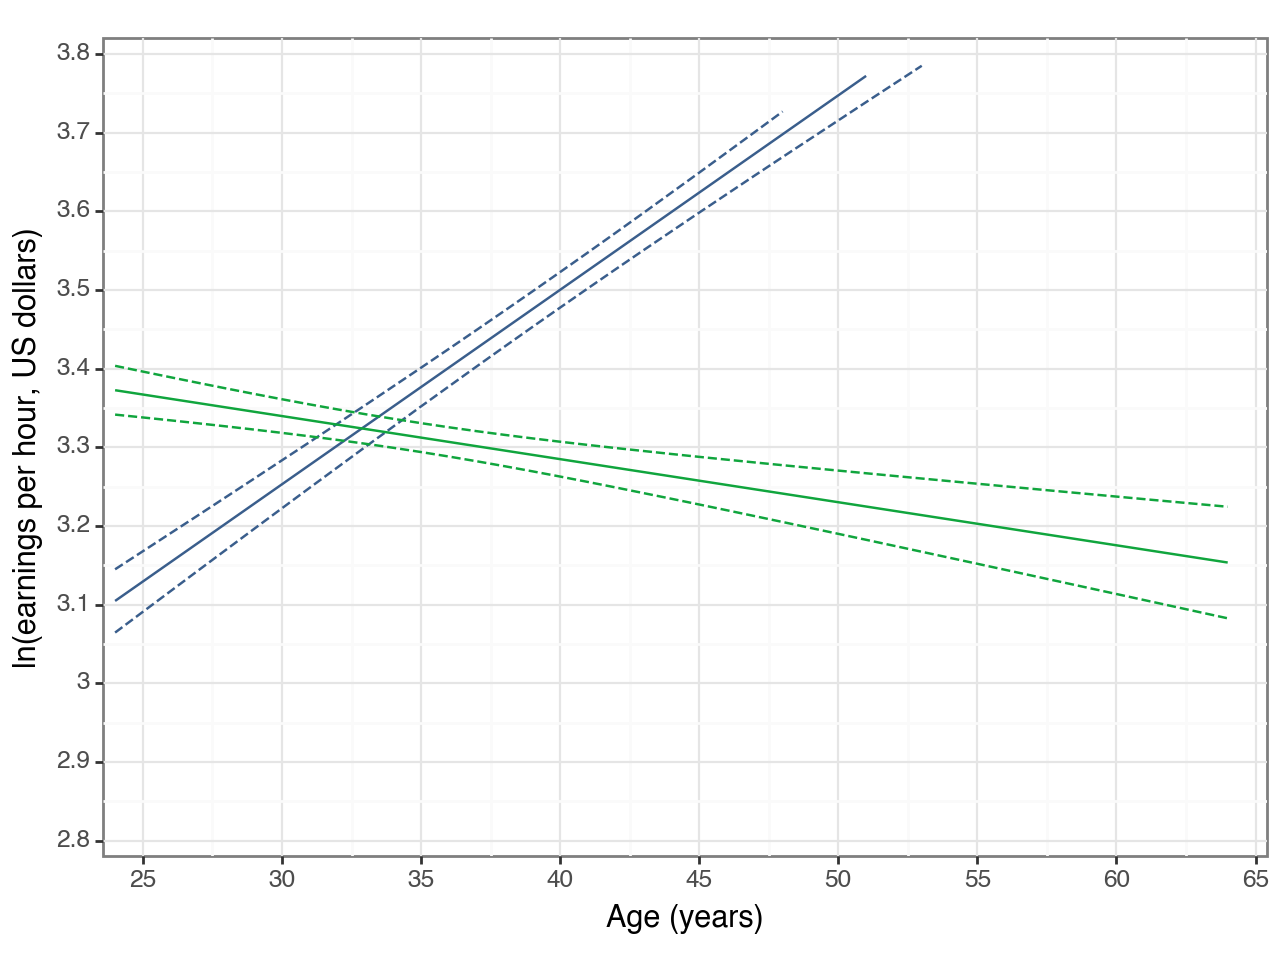

<Figure Size: (640 x 480)>

In [460]:
(
    ggplot(data_m, aes(x="age", y="fit"))
    + geom_line(colour=color[0])
    + geom_line(data_m, aes(x="age", y="CIup"), colour=color[0], linetype="dashed")
    + geom_line(data_m, aes(x="age", y="CIlo"), colour=color[0], linetype="dashed")
    + geom_line(data_f, aes(x="age", y="fit"), colour=color[1])
    + geom_line(data_f, aes(x="age", y="CIup"), colour=color[1], linetype="dashed")
    + geom_line(data_f, aes(x="age", y="CIlo"), colour=color[1], linetype="dashed")
    + labs(x="Age (years)", y="ln(earnings per hour, US dollars)")
    + scale_x_continuous(expand=(0.01, 0.01), limits=(24, 65), breaks=seq(25, 65, by=5))
    + scale_y_continuous(
        expand=(0.01, 0.01), limits=(2.8, 3.8), breaks=seq(2.8, 3.8, by=0.1)
    )
    + theme_bw()
)

Including the interaction $female\times age$ enables us to see that the earnings difference appears to be higher for older age

-> growing gap 

Without interaction -> two parallel lines would be at constant distance

### Gender differences in earnings – log earnings, gender, 4th-order polynomial of age, and their interaction

In [461]:
data["agesq"] = np.power(data["age"], 2) # squared
data["agecu"] = np.power(data["age"], 3) # cubic
data["agequ"] = np.power(data["age"], 4) # power 4


In [462]:
reg9 = smf.ols(formula="lnw~age+agesq+agecu+agequ", data=data.query("female==1")).fit(
    cov_type="HC1"
) # for women
reg10 = smf.ols(formula="lnw~age+agesq+agecu+agequ", data=data.query("female==0")).fit(
    cov_type="HC1"
) # for men
reg11 = smf.ols(
    formula="lnw ~ age + agesq + agecu + agequ + female + female*age + female*agesq + female*agecu + female*agequ",
    data=data,
).fit(cov_type="HC1")

In [463]:
Stargazer([reg9, reg10, reg11])

Fig x $(ln{w})^E = \beta_0 + \beta_1 age + \beta_2age^2+\beta_3age^3+\beta_4age^4+\beta_5female + \beta_6female\times age + \beta_7female\times age^2 + \beta_8female\times age^3 + \beta_9 female\times age^4$

In [464]:
# PREDICTION AND GRAPH POLYNOMIAL
# male
data_m = data.query("female==0")

pred = reg11.predict(data_m)

pred = reg11.get_prediction(data_m).summary_frame()[["mean", "mean_se"]]
pred.columns = ["fit", "fit_se"]

data_m = data_m.reset_index(drop=True).join(pred)

data_m["CIup"] = data_m["fit"] + 0.2 * data_m["fit_se"]
data_m["CIlo"] = data_m["fit"] - 0.2 * data_m["fit_se"]

# female
data_f = data.query("female==1")

pred = reg11.predict(data_f)

pred = reg11.get_prediction(data_f).summary_frame()[["mean", "mean_se"]]
pred.columns = ["fit", "fit_se"]

data_f = data_f.reset_index(drop=True).join(pred)

data_f["CIup"] = data_f["fit"] + 0.2 * data_f["fit_se"]
data_f["CIlo"] = data_f["fit"] - 0.2 * data_f["fit_se"]


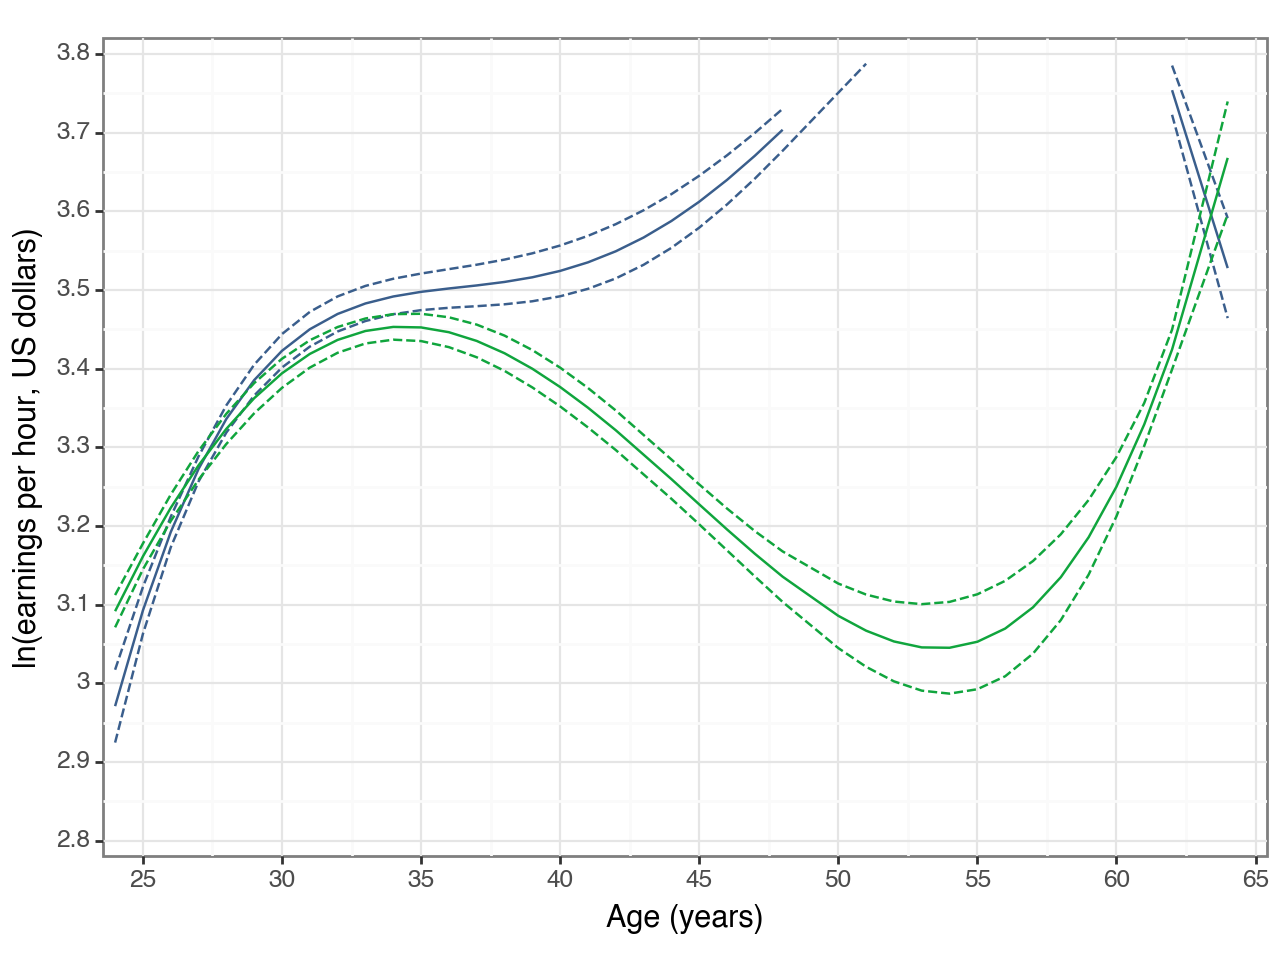

<Figure Size: (640 x 480)>

In [465]:
(
    ggplot(data_m, aes(x="age", y="fit"))
    + geom_line(colour=color[0])
    + geom_line(data_m, aes(x="age", y="CIup"), colour=color[0], linetype="dashed")
    + geom_line(data_m, aes(x="age", y="CIlo"), colour=color[0], linetype="dashed")
    + geom_line(data_f, aes(x="age", y="fit"), colour=color[1])
    + geom_line(data_f, aes(x="age", y="CIup"), colour=color[1], linetype="dashed")
    + geom_line(data_f, aes(x="age", y="CIlo"), colour=color[1], linetype="dashed")
    + labs(x="Age (years)", y="ln(earnings per hour, US dollars)")
    + scale_x_continuous(expand=(0.01, 0.01), limits=(24, 65), breaks=seq(25, 65, by=5))
    + scale_y_continuous(
        expand=(0.01, 0.01), limits=(2.8, 3.8), breaks=seq(2.8, 3.8, by=0.1)
    )
    + theme_bw()
)

- At younger ages (between 25 and age 35) 2 confidence intervals overlap it comes out maybe there is not much difference in t. At age 45 the difference is nearly 30%. Its at the top %80 by age 55 and the difference decrease from age 55 to 63. 

## Causal analysis
IS IT DISCRIMINATION?

In the data, relatively large average gender difference in earnings between ages 40 and 55

-> analyze it to see if members of a group (women, minorities) earn systematically less per hour than the others (men, majority), all other things being equal -> towards causality (but impossible to control for everything

In [466]:
# FILTER DATA ACCORDING THE AGE-  SELECTION of the sample we need
data = data.query("age>=40 & age<=55")

In [467]:
data["white"] = (data["race"] == 1).astype(int)
data["afram"] = (data["race"] == 2).astype(int)
data["asian"] = (data["race"] == 4).astype(int)
data["hisp"] = (data["ethnic"].notna()).astype(int)
data["othernonw"] = (
    (data["white"] == 0) & (data["afram"] == 0) & (data["asian"] == 0) & (data["hisp"] == 0)
).astype(int) #other nonwhite
data["nonUSborn"] = (
    (data["prcitshp"] == "Foreign Born, US Cit By Naturalization")
    | (data["prcitshp"] == "Foreign Born, Not a US Citizen")
).astype(int)

In [468]:
# Potentially endogeneous demographics
data["married"] = ((data["marital"] == 1) | (data["marital"] == 2)).astype(int)
data["divorced"] = ((data["marital"] == 3) & (data["marital"] == 5)).astype(int)
data["wirowed"] = (data["marital"] == 4).astype(int)
data["nevermar"] = (data["marital"] == 7).astype(int)

data["child0"] = (data["chldpres"] == 0).astype(int)
data["child1"] = (data["chldpres"] == 1).astype(int)
data["child2"] = (data["chldpres"] == 2).astype(int)
data["child3"] = (data["chldpres"] == 3).astype(int)
data["child4pl"] = (data["chldpres"] >= 4).astype(int)

# Work-related variables
data["fedgov"] = (data["class"] == "Government - Federal").astype(int)
data["stagov"] = (data["class"] == "Government - State").astype(int)
data["locgov"] = (data["class"] == "Government - Local").astype(int)
data["nonprof"] = (data["class"] == "Private, Nonprofit").astype(int)
data["ind2dig"] = ((pd.Categorical(data["ind02"]).codes + 1) / 100).astype(int)
data["occ2dig"] = (data["occ2012"] / 100).astype(int)
data["union"] = ((data["unionmme"] == "Yes") | (data["unioncov"] == "Yes")).astype(int)

In [469]:
data["uhourssq"] = np.power(data["uhours"], 2)
data["uhourscu"] = np.power(data["uhours"], 3)
data["uhoursqu"] = np.power(data["uhours"], 4)

### Gender differences in earnings – regression with many covariates on a narrower sample

In [470]:
# Extended regressions
reg12 = smf.ols(formula="lnw ~ female", data=data).fit(cov_type="HC1") # unconditional gender gap
reg13 = smf.ols(formula="lnw ~ female + age + ed_MA + ed_BA", data=data).fit(
    cov_type="HC1" # age, gender and education
)
reg14 = smf.ols(
    formula="lnw ~ female + age + afram + hisp + asian + othernonw + nonUSborn + ed_MA + ed_BA + married + divorced+ wirowed + child1 + child2 + child3 +child4pl + C(stfips) + uhours + fedgov + stagov + locgov + nonprof + union + C(ind2dig) + C(occ2dig)",
    data=data,
).fit(cov_type="HC1")
reg15 = smf.ols(
    formula="lnw ~ female + age + afram + hisp + asian + othernonw + nonUSborn + ed_MA + ed_BA + married + divorced+ wirowed + child1 + child2 + child3 +child4pl + C(stfips) + uhours + fedgov + stagov + locgov + nonprof + union + C(ind2dig) + C(occ2dig) + agesq + agecu + agequ + uhoursqu + uhourscu + uhourssq",
    data=data,
).fit(cov_type="HC1")


In [471]:
stargazer = Stargazer([reg12, reg13, reg14, reg15])
stargazer.covariate_order(["female"])
stargazer.add_line("Age and education", ["", "Yes", "Yes", "Yes"])
stargazer.add_line("Family circumstances", ["", "", "Yes", "Yes"])
stargazer.add_line("Demographic background", ["", "", "Yes", "Yes"])
stargazer.add_line("Job characteristics", ["", "", "Yes", "Yes"])
stargazer.add_line("Age in polynomial", ["", "", "", "Yes"])
stargazer.add_line("Hours in polynomial", ["", "", "", "Yes"])
stargazer

- Unconditional coefficient increases because we took some biases in and R square increases with the increasing regression numbers

- (1): women are expected to earn, on average, 52.8% less than men (in the data)
- (2): conditioning on age and on education, the difference is 53.7% -> differences in age and education do not contribute that much to gender difference in earnings -> check CIs and see if they overlap
- (3): including all other covariates, the estimated coefficient is 20% -> comparing people with same personal and family characteristics and job features, women are expected to earn 20% less than men
- (4): include potential nonlinearities in age and hours -> similar estimate 17%

We can conclude that
- the gender gap is quite small below age 30, while largest between ages 40 and 55 
- whether due to discrimination or other reasons, gender differences tend to be smaller for younger employees 